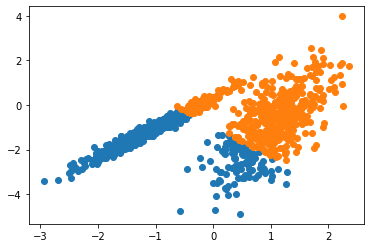

In [3]:
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
from matplotlib import pyplot
# Датасетыг тодорхойлох
X, _ = make_classification(n_samples=1000, n_features=2,
n_informative=2, n_redundant=0, n_clusters_per_class=1,
random_state=4)
# Моделыг тодорхойлох
model = KMeans(n_clusters=2)
# Моделд тохируулах
model.fit(X)
# Жишээ бүрт кластерыг оноох
yhat = model.predict(X)
# Ялгаатай кластеруудыг хайх
clusters = unique(yhat)
# Кластер бүрийн дээжүүдээр сарнилтын график үүсгэх
for cluster in clusters:
# Тухайн кластерын дээжийн эгнээний индексийг авах
    row_ix = where(yhat == cluster)
# Дээжүүдээр сарнилтын график зурах
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# Графикийг харуулах
pyplot.show()

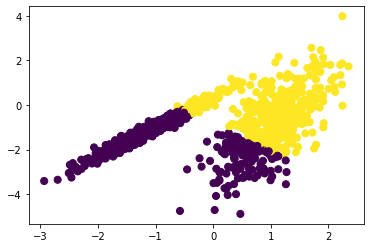

In [19]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # 2a. Assign labels based on closest center. Compute minimum distances between center and a set of points.
        labels = pairwise_distances_argmin(X, centers, metric = 'euclidean')
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    return centers, labels

centers, labels = find_clusters(X, 2)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

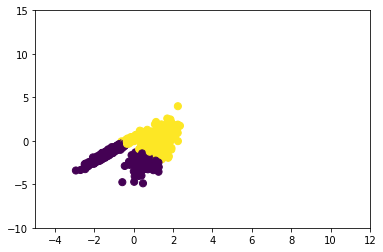

In [17]:
# importing dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
  
# function to plot the selected centroids
def plot(data, centroids):
    plt.scatter(data[:, 0], data[:, 1], c=labels,
            s=50, cmap='viridis');     
    plt.xlim(-5, 12)
    plt.ylim(-10, 15)
    plt.show()
          
# function to compute euclidean distance
def distance(p1, p2):
    return np.sum((p1 - p2)**2)
  
# initialization algorithm
def initialize(data, k):
    ## initialize the centroids list and add
    ## a randomly selected data point to the list
    centroids = []
    centroids.append(data[np.random.randint(
            data.shape[0]), :])
    plot(data, np.array(centroids))
  
    ## compute remaining k - 1 centroids
    for c_id in range(k - 1):
        ## initialize a list to store distances of data
        ## points from nearest centroid
        dist = []
        for i in range(data.shape[0]):
            point = data[i, :]
            d = sys.maxsize
             
            ## compute distance of 'point' from each of the previously
            ## selected centroid and store the minimum distance
            for j in range(len(centroids)):
                temp_dist = distance(point, centroids[j])
                d = min(d, temp_dist)
            dist.append(d)
             
        ## select data point with maximum distance as our next centroid
        dist = np.array(dist)
        next_centroid = data[np.argmax(dist), :]
        centroids.append(next_centroid)
        dist = []
    return centroids
  
centroids = initialize(X, k = 2)